# 1. Trabajo Práctico N°2: de Analisis + Curación

# Trabajo Práctico N°2: Análisis Exploratorio y Curación de Datos

## Introducción

Este trabajo práctico intenta continúa la exploración de los datasets planteados en el [primer trabajo práctico](https://github.com/luisdvlpr/diplodatos2021-datasets/blob/main/TP1_Analisis_y_Visualizacion/enunciado_tp1_analisis_y_visualizacion.ipynb)

En el primer práctico pudimos notar algunas características propias de las series temporales y en particular del dominio del comportamiento de un ecommerce genérico. Muchas de ellas son __series no estacionarias__, ya que la caracterización de estas distribuciones ( media, varianza ) cambian a través del tiempo y se observan ademas alguna tendencias. __Por otra parte se se distinguen patrones de estacionalidad, por ej. semanal__. 

Lo anterior trae __consecuencias__ directas en la selección de las metodologías adecuadas para abordar las problemáticas de tratamiento de __valores faltantes__, detección de __outliers__ y la construcción de __modelos predictivos__.

Por otra parte, debe notarse que el tamaño de las economías de cada pais y la adopción de los hábitos de uso de estas plataformas en cada uno de ellos hace que el uso de cantidad de sesiones no sea una medida adecuada para compararles. Entonces, el análisis de estas series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los índices originales, previamente se habitúa realizar una __transformación logarítmica__ o trabajar con la __tasa de conversión__ a fin de expresarlos en un __único métrica que les caracterice__ para evitar distorsiones debidas a los tamaños de sus economías y hábitos de uso.

### Carga del dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# some config

plt.rcParams['figure.figsize'] = (12, 9)
pd.options.display.float_format = '{:20,.2f}'.format #configuración para sacar la notación cientifica

In [3]:
#cambie parse_dates=True, por la columna especifica de fecha para que aplique el tipo de formato e indexe por fecha
data_orig = pd.read_csv(
    'https://raw.githubusercontent.com/luisepifanio/diplodatos2021-datasets/main/TP2_Analisis_y_Curacion/datasets/traffic_AR_CL_UY.csv', 
    usecols = ["Fecha", "flow", "Site", "Device", "Loading", "Shipping", "Payments", "Review", "Congrats"], 
    parse_dates=["Fecha"],index_col=["Fecha"])
traffic_data=data_orig.copy() #para filtrar

In [4]:
#filtramos los datos para trabajar solo con MLA, flujo directo, desktop y android

traffic_data = traffic_data[traffic_data.Site==("MLA")]
traffic_data = traffic_data[traffic_data.flow==("direct")]
traffic_data = traffic_data[(traffic_data.Device==("Android"))|(traffic_data.Device==("Desktop"))]

#agrupamos las columnas que sean etapas de compra de interés. 
cols_etapas = ['Shipping', 'Payments', 'Review', 'Congrats']

df_traf=traffic_data.copy() #para luego reemplazar nulos por nan

In [5]:
#agregamos columnas relativas a las fechas

#df_traffic=traffic_data.copy()
#df_traffic["Weekday"] = traffic_data.index.day_name()
#df_traffic["Month"] = traffic_data.index.month_name()
#df_traffic["Year"] = traffic_data.index.year
#new = df_traffic["Month"].copy().astype(str)
#new1 = df_traffic["Year"].copy().astype(str)
#df_traffic["Months"]= new.str.cat(new1, sep ="-")

In [6]:
#agregamos columnas relativas a las tasas de conversión entre las diferentes etapas de compra
#df_traffic["Shipping-Payments"] = df_traffic["Payments"] / df_traffic["Shipping"]
#df_traffic["Payments-Review"] = df_traffic["Review"] / df_traffic["Payments"]
#df_traffic["Review-Congrats"] = df_traffic["Congrats"] / df_traffic["Review"]
#df_traffic["Shipping-Congrats"] = df_traffic["Congrats"] / df_traffic["Shipping"]

#agrupamos las columnas de índices para evaluar su comportamiento por separado de las etapas
#cols_indices = ['Shipping-Payments', 'Payments-Review', 'Review-Congrats', 'Shipping-Congrats']

# volvemos a definir los dos datasets de interes con las nuevas columnas
#df_traffic_desktop = df_traffic[df_traffic.Device==("Desktop")]
#df_traffic_android = df_traffic[df_traffic.Device==("Android")]

# Consignas del trabajo práctico N°2

El objetivo general del práctico es realizar algunas tareas de __preprocesamiento__ de los datos y luego __analizar las series obtenidas__ de dicho preprocesamiento en forma similar a la empleada en el TP1.

Se proponen las siguientes actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales:

#### Tratamiento de faltantes

- Identificar valores perdidos, huecos en los datos ej: aquellos días para los que no hubo datos

- Identificar aquellos valores "sospechosos", debido al dropout ( o perdida de sesiones) a medidas que avanzas en 
  las pantallas la cantidad de sesiones en la pantalla posterior es menor/igual al de su predecesora

- Imputar los valores sospechoso con otros que tengan sentido dentro del dominio segun lo explicado en el punto anterior

- Imputar los faltantes debidos a fallas de medición usando un algoritmo adecuado para series temporales, 
  por ejemplo splines, interpolaciones, valores de medias/medianas móviles por ventana de tiempo

- Comparar los valores originales vs los imputados y juzgue si los valores se mantienen dentro de parametros aceptables, ¿Como justificaría que dichos valores imputados tienen sentido en su analisis?


#### Transformaciones

Obtener las siguientes series transformadas:

- Los logaritmos naturales de los índices. 

- Las tasas de conversion.

#### Exploración de las series transformadas

Reutilizar parte del código del TP1 para analizar las series transformadas. En una primera etapa se puede trabajar con solo una de las series resultantes de tomar logaritmo natural y una serie de tasa de conversión.

- Analizar las distribuciones por medio de gráficos y medidas de estadística descriptiva.

- Dichas distribuciones, ¿se mantienen relativamente inalteradas en el tiempo?

- ¿Hay outliers?

- Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse? ¿Tienden a moverse en forma conjunta?  ¿Siempre se da dicho patrón? ¿Hay períodos de crisis? En caso de que existan crisis / eventos , ¿Son globales o propias de sites individuales? 

- To Be defined: De ser definido, podemos establecer un grupo de control versus ls valores imputados y establecer 
  que tan buenos resultaron los métodos ejecutados para rellenar los valores respecto de los deseables

#### Opcional
- Graficar e interpretar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).
- Explorar la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

## Fecha de entrega

- __Versión preliminar: 03/07__ 

- __Version final: 07/07__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo puede orientarse para un público técnico pero que desconoce los aspectos propios del problema como sus compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se explique un análisis escrito suficientemente detallado de los resultados. 


***DATOS FALTANTES***

In [7]:
#Buscamos si hay datos faltantes según el tipo de DEVICE
traffic_data.drop('Device', 1).isna().groupby(traffic_data.Device, sort=False).sum()

,flow,Site,Loading,Shipping,Payments,Review,Congrats
Device,,,,,,,
Android,0,0,0,1,0,2,0
Desktop,0,0,0,0,0,0,0


Solo tres datos aparecen como faltantes en el dataset, dos de ellos el la etapa de review y uno en la etapa de shipping. Los tres pertenecen al device ANDROID. En DESKTOP no se presetan datos faltantes.

In [8]:
#localizamos los datos faltantes en el dataset original
traffic_data[traffic_data['Shipping'].isnull()|traffic_data['Review'].isnull()]

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
Fecha,,,,,,,,
2019-03-22,direct,MLA,Android,179146,"169,846.00",138177,nan,89890
2019-05-07,direct,MLA,Android,224056,nan,172472,"121,321.00",113250
2019-08-27,direct,MLA,Android,236701,"223,993.00",180928,nan,113464


Podemos identificar que los 3 datos faltantes corresponden a los devices Android sin estar correlacionados entre sí, con fechas diferentes en cada caso: 22-Marzo, 7-Mayo y 27-Agosto de 2019.

***DATOS NULOS***

In [9]:
#buscamos los datos nulos e identificamos en qué columnas se encuentran..
cols_null = traffic_data[traffic_data == 0].count(axis=0)
cols_null[cols_null > 0]

Loading     4
Shipping    4
Payments    4
Review      4
Congrats    4
dtype: int64

In [10]:
#buscamos en el data set el conjunto de datos correspondientes a los casos donde se encuentran los valores nulos
columns = traffic_data.columns.tolist()
columns
traffic_data_null = traffic_data[(traffic_data.iloc[:,:] == 0).any(axis=1)]
traffic_data_null

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
Fecha,,,,,,,,
2019-12-05,direct,MLA,Android,0,0.00,0,0.00,0
2019-12-05,direct,MLA,Desktop,0,0.00,0,0.00,0
2019-12-06,direct,MLA,Android,0,0.00,0,0.00,0
2019-12-06,direct,MLA,Desktop,0,0.00,0,0.00,0


Podemos afirmar que solo hay dos fechas con valores iguales a 0. Ambos se corresponden a los mismos días tanto para Android como para Desktop: 5 y 6 de Diciembre de 2019. Dos días consecutivos.
En ambos casos, todas las etapas son 0, por ello los convertiremos en Nan y luego los imputaremos.

In [11]:
#Reemplazamos los valos nulos por nan
df_traf = df_traf.replace(['0', 0], np.nan)

In [12]:
#verificamos
df_traf['2019-12-05':'2019-12-06']

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
Fecha,,,,,,,,
2019-12-05,direct,MLA,Android,nan,nan,nan,nan,nan
2019-12-05,direct,MLA,Desktop,nan,nan,nan,nan,nan
2019-12-06,direct,MLA,Android,nan,nan,nan,nan,nan
2019-12-06,direct,MLA,Desktop,nan,nan,nan,nan,nan


**DATOS SOSPECHOSOS**

In [13]:
#agregamos columnas relativas a las tasas de conversión entre las diferentes etapas de compra
df_traffic=df_traf.copy()
df_traffic["Shipping-Payments"] = df_traffic["Payments"] / df_traffic["Shipping"]
df_traffic["Payments-Review"] = df_traffic["Review"] / df_traffic["Payments"]
df_traffic["Review-Congrats"] = df_traffic["Congrats"] / df_traffic["Review"]
df_traffic["Shipping-Congrats"] = df_traffic["Congrats"] / df_traffic["Shipping"]

#agrupamos las columnas de índices para evaluar su comportamiento por separado de las etapas
cols_indices = ['Shipping-Payments', 'Payments-Review', 'Review-Congrats', 'Shipping-Congrats']

#agregamos columnas relativas a las fechas ya que nos interesa el comportamiento temporal
df_traffic["Weekday"] = df_traf.index.day_name()
df_traffic["Month"] = df_traf.index.month_name()
df_traffic["Year"] = df_traf.index.year
new = df_traffic["Month"].copy().astype(str)
new1 = df_traffic["Year"].copy().astype(str)
df_traffic["Months"]= new.str.cat(new1, sep ="-")

# volvemos a definir los dos datasets de interes con las nuevas columnas
df_traffic_desktop = df_traffic[df_traffic.Device==("Desktop")]
df_traffic_android = df_traffic[df_traffic.Device==("Android")]

In [14]:
#Buscamos en el dataset observaciones que no cumplan con la lógica del funnel, que presenten en una etapa previa menos
#observaciones que en una posterior
columns = df_traffic.columns.tolist()
columns
df_traffic_sospechoso = df_traffic[(df_traffic[cols_indices].iloc[:,:] > 1).any(axis=1)]
df_traffic_sospechoso

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Shipping-Payments,Payments-Review,Review-Congrats,Shipping-Congrats,Weekday,Month,Year,Months
Fecha,,,,,,,,,,,,,,,,


Como el dataset no cuenta con observaciones donde la tasa de conversión entre dos etapas consecutivas sea mayor que 1, concluimos que el dataset no presenta valores sospechosos en este sentido.

# Exploración del dataset

Habiendo realizado un primer análisis de valores perdidos y nulos, procedemos a visualizar el dataset buscando otras inconsistencias que deban ser tenidas en cuenta.
En primer lugar observamos los diagramas de caja de las distintas etapas para los dos dispositivos, desktop y android, y luego las tasas de conversión entre etapas de los mismos.

In [15]:
#Analizamos de manera general como quedan algunas métricas luego de pasar los valores nulos a nan. 
df_traffic.describe()

,Loading,Shipping,Payments,Review,Congrats,Shipping-Payments,Payments-Review,Review-Congrats,Shipping-Congrats,Year
count,972.00,971.00,972.00,970.00,972.00,971.00,970.00,970.00,971.00,976.00
mean,"192,955.77","181,541.90","148,428.32","103,622.26","97,196.05",0.82,0.71,0.95,0.56,"2,019.37"
std,"109,318.01","102,431.53","82,304.53","54,368.80","49,451.14",0.04,0.06,0.03,0.08,0.48
min,"30,819.00","28,722.00","3,823.00","2,597.00","2,538.00",0.03,0.50,0.86,0.02,"2,019.00"
25%,"121,197.25","114,433.00","96,055.25","71,472.25","68,528.50",0.81,0.67,0.92,0.49,"2,019.00"
50%,"171,517.00","162,331.00","130,287.50","90,169.50","85,017.00",0.82,0.71,0.94,0.55,"2,019.00"
75%,"247,064.25","234,561.00","189,188.00","133,115.75","124,910.25",0.85,0.77,0.97,0.63,"2,020.00"
max,"563,592.00","537,723.00","444,330.00","286,162.00","264,742.00",0.88,0.81,1.00,0.68,"2,020.00"


Text(0.5, 1.0, 'Etapas')

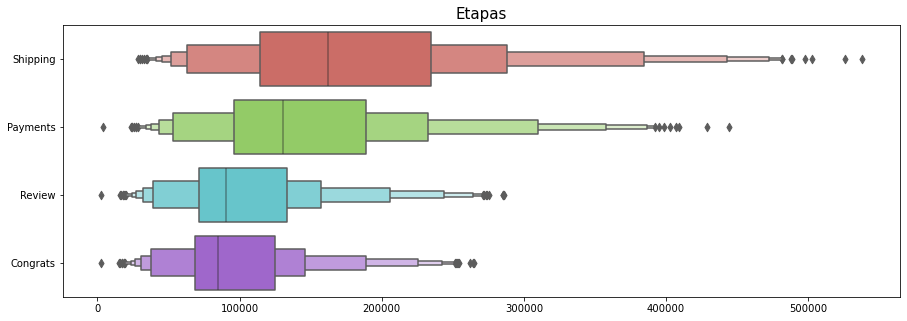

In [16]:
#nos llaman la atención los valores mínimos de las etapas PAYMENTS, REVIEW Y CONGRATS.
#Analizamos con un boxenplot si se trata de outliers
plt.rcParams['figure.figsize'] = (15, 5)
sns.boxenplot(data=df_traffic[cols_etapas], orient="h", palette='hls')
plt.title('Etapas', size=15)

El boxenplot los ubica claramente como outliers.

In [17]:
#Identificamos los casos con Payments menores a 25000 cómo parámetro, dado que el mínimo identificado que el mínimo de la etapa anterior es de 28000
df_traffic.Payments[df_traffic.Payments<25000].value_counts()

23,918.00    1
24,136.00    1
 3,823.00    1
24,057.00    1
Name: Payments, dtype: int64

In [18]:
#buscamos en el data set el conjunto de datos correspondientes al mínimo de Payments
df_traffic[df_traffic.Payments<4000]

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Shipping-Payments,Payments-Review,Review-Congrats,Shipping-Congrats,Weekday,Month,Year,Months
Fecha,,,,,,,,,,,,,,,,
2019-12-04,direct,MLA,Desktop,"146,932.00","138,124.00","3,823.00","2,597.00","2,538.00",0.03,0.68,0.98,0.02,Wednesday,December,2019,December-2019


Identificamos que se corresponde el día previo a las dos fechas con datos nulos. Además, en esa misma fecha se encuentran los mínimos tambien de las etapas Review y Congrats y de los indices: Shipping-Payments y Shipping-Congrats.

Text(0.5, 1.0, 'Etapas-DESKTOP')

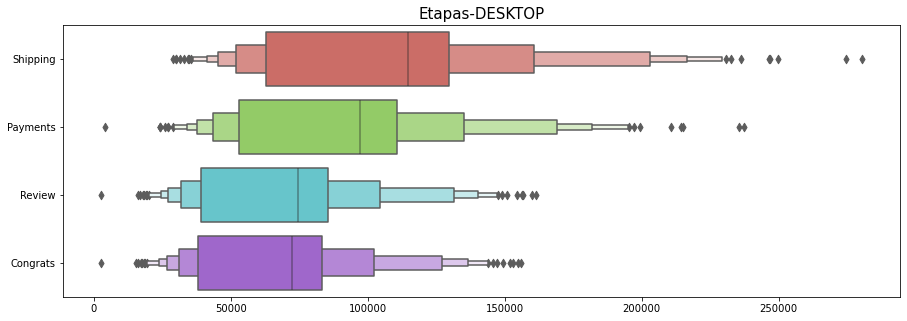

In [19]:
sns.boxenplot(data=df_traffic_desktop[cols_etapas], orient="h", palette='hls')
plt.title('Etapas-DESKTOP', size=15)

In [20]:
#Sabiendo que se trata de un caso sospechoso de Diciembre, mes donde también se ubican los dos valores faltantes, analizamos el comportamiento en dicho mes según el día de la semana
df_traffic_desktop['2019-12'].groupby('Weekday')["Payments"].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
Friday,3.00,"95,851.00","11,253.31","85,122.00","89,994.50","94,867.00","101,215.50","107,564.00"
Monday,5.00,"113,220.80","21,608.89","82,839.00","98,213.00","124,497.00","127,989.00","132,566.00"
Saturday,4.00,"46,894.50","4,469.53","42,332.00","43,440.50","47,051.50","50,505.50","51,143.00"
Sunday,5.00,"46,296.00","7,098.50","37,134.00","43,236.00","44,128.00","53,411.00","53,571.00"
Thursday,3.00,"111,018.33","8,899.68","101,565.00","106,910.00","112,255.00","115,745.00","119,235.00"
Tuesday,5.00,"85,130.40","47,793.26","31,435.00","35,101.00","110,651.00","119,683.00","128,782.00"
Wednesday,4.00,"67,886.50","62,047.18","3,823.00","20,448.25","70,339.00","117,777.25","127,045.00"


In [21]:
#analizamos la desviación estandard la cual nos sirve para validar la "sospecha" del valor del miércoles y también será util a futuro para comparar con los datos imputados
df_traffic_desktop['2019-12'].groupby('Weekday')[cols_indices].std()

,Shipping-Payments,Payments-Review,Review-Congrats,Shipping-Congrats
Weekday,,,,
Friday,0.00,0.00,0.00,0.01
Monday,0.01,0.02,0.04,0.05
Saturday,0.03,0.01,0.00,0.02
Sunday,0.00,0.02,0.00,0.01
Thursday,0.00,0.01,0.00,0.01
Tuesday,0.00,0.02,0.00,0.02
Wednesday,0.41,0.06,0.00,0.31


In [22]:
#vemos las dos primeras semanas en detalle para evaluar el método de imputación
df_traffic_desktop['2019-12-01':'2019-12-15']

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Shipping-Payments,Payments-Review,Review-Congrats,Shipping-Congrats,Weekday,Month,Year,Months
Fecha,,,,,,,,,,,,,,,,
2019-12-01,direct,MLA,Desktop,"68,092.00","63,802.00","53,571.00","39,182.00","38,012.00",0.84,0.73,0.97,0.60,Sunday,December,2019,December-2019
2019-12-02,direct,MLA,Desktop,"159,571.00","150,265.00","127,989.00","99,196.00","96,971.00",0.85,0.78,0.98,0.65,Monday,December,2019,December-2019
2019-12-03,direct,MLA,Desktop,"150,314.00","141,215.00","119,683.00","93,403.00","90,750.00",0.85,0.78,0.97,0.64,Tuesday,December,2019,December-2019
2019-12-04,direct,MLA,Desktop,"146,932.00","138,124.00","3,823.00","2,597.00","2,538.00",0.03,0.68,0.98,0.02,Wednesday,December,2019,December-2019
2019-12-05,direct,MLA,Desktop,nan,nan,nan,nan,nan,nan,nan,nan,nan,Thursday,December,2019,December-2019
2019-12-06,direct,MLA,Desktop,nan,nan,nan,nan,nan,nan,nan,nan,nan,Friday,December,2019,December-2019
2019-12-07,direct,MLA,Desktop,"57,871.00","54,174.00","42,332.00","32,002.00","31,228.00",0.78,0.76,0.98,0.58,Saturday,December,2019,December-2019
2019-12-08,direct,MLA,Desktop,"55,893.00","52,426.00","44,128.00","32,605.00","31,743.00",0.84,0.74,0.97,0.61,Sunday,December,2019,December-2019
2019-12-09,direct,MLA,Desktop,"155,212.00","145,501.00","124,497.00","99,439.00","97,272.00",0.86,0.80,0.98,0.67,Monday,December,2019,December-2019


Text(0.5, 1.0, 'Etapas-ANDROID')

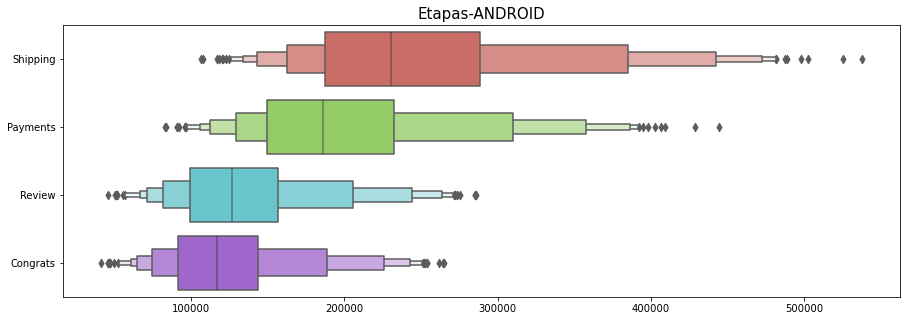

In [23]:
sns.boxenplot(data=df_traffic_android[cols_etapas], orient="h", palette='hls')
plt.title('Etapas-ANDROID', size=15)

 En lineas generales el análisis de los diagramas de caja se mantiene inalterado respecto a lo presentado en la entrega anterior. La distribución de las etapas sigue la lógica de drop-out, como era de esperar, y presenta outliers positivos y negativos en todas las etapas. 
 Como ya hemos dicho, prestaremos cierta atención a los outliers de menor valor identificados en DESKTOP.

Text(0.5, 1.0, 'Indices-DESKTOP')

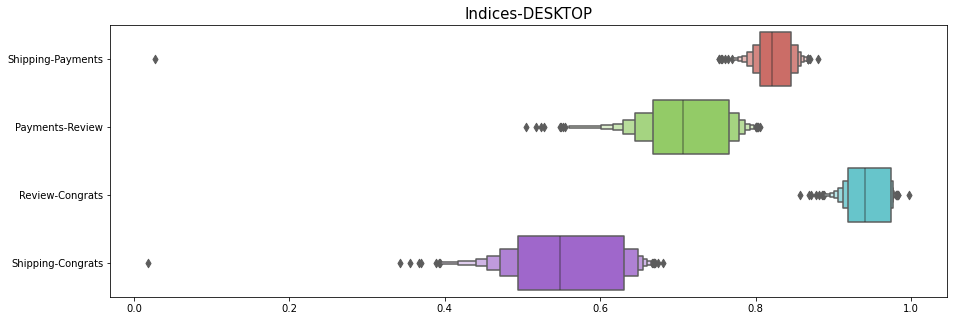

In [24]:
#Analizamos boxenplot de los indices de conversión en DESKTOP, donde se espera un efecto de los outliers encontrados en las etapas.
sns.boxenplot(data=df_traffic[cols_indices], orient="h", palette='hls')
plt.title('Indices-DESKTOP', size=15)

Text(0.5, 1.0, 'Indices-ANDROID')

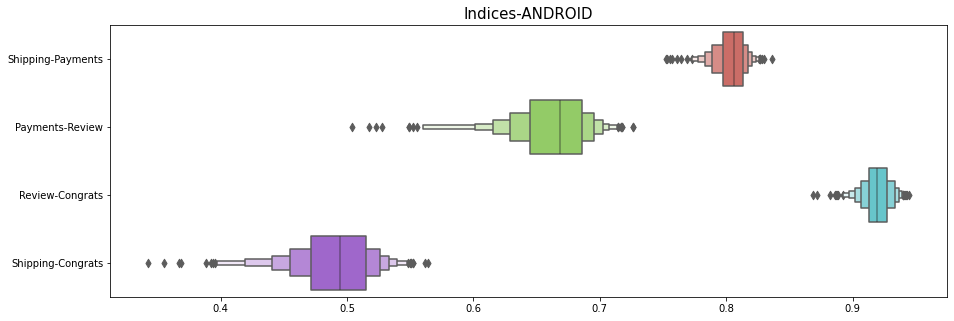

In [25]:
sns.boxenplot(data=df_traffic_android[cols_indices], orient="h", palette='hls')
plt.title('Indices-ANDROID', size=15)

Al analizar las tasas de conversión vemos que aún se mantienem algunos indices cercanos a cero, pero esto sucede porque aún no se han imputado los valores faltantes.

Por último, en esta etapa de visualización se presentan las series temporales de las distintas etapas, divididas por dispositivo, y presentando tanto el dato original como la tasa de conversión. Dichos gráficos serán útiles para evaluar el impacto de la imputación.

Text(0.5, 1.0, 'DESKTOP-Indices')

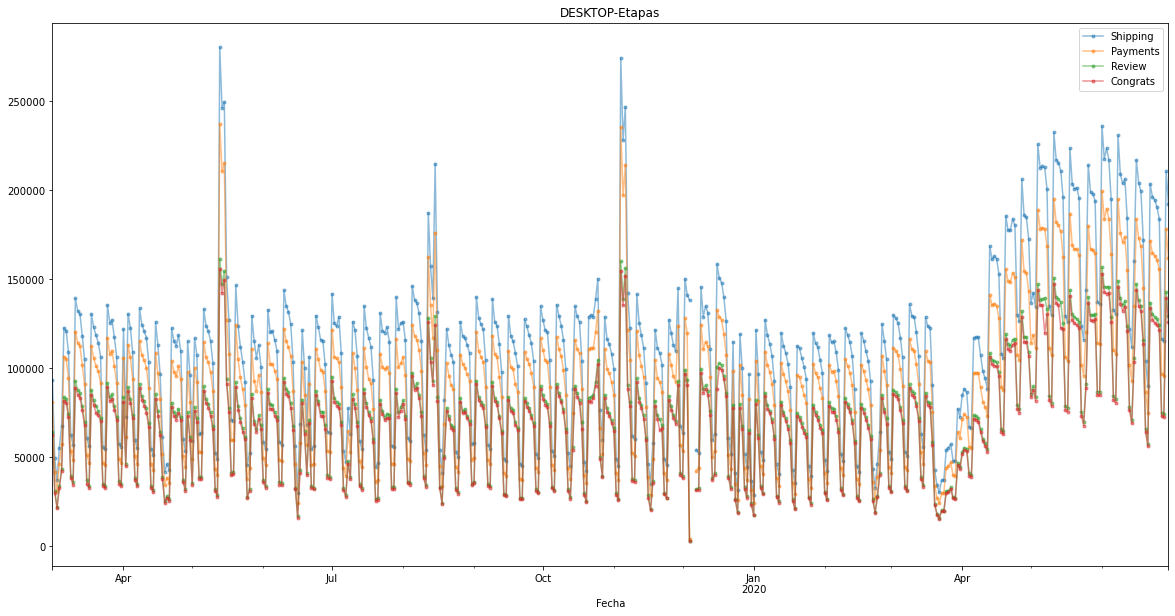

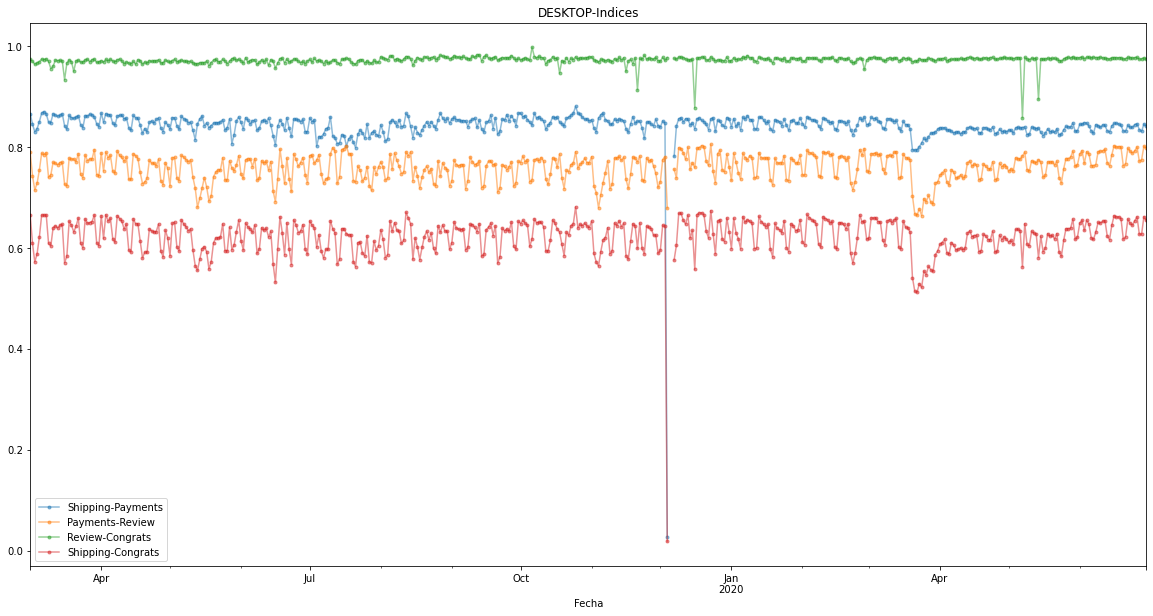

In [26]:
df_traffic_desktop[cols_etapas].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10)).set_title("DESKTOP-Etapas")
df_traffic_desktop[cols_indices].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10)).set_title("DESKTOP-Indices")

Text(0.5, 1.0, 'ANDROID-Indices')

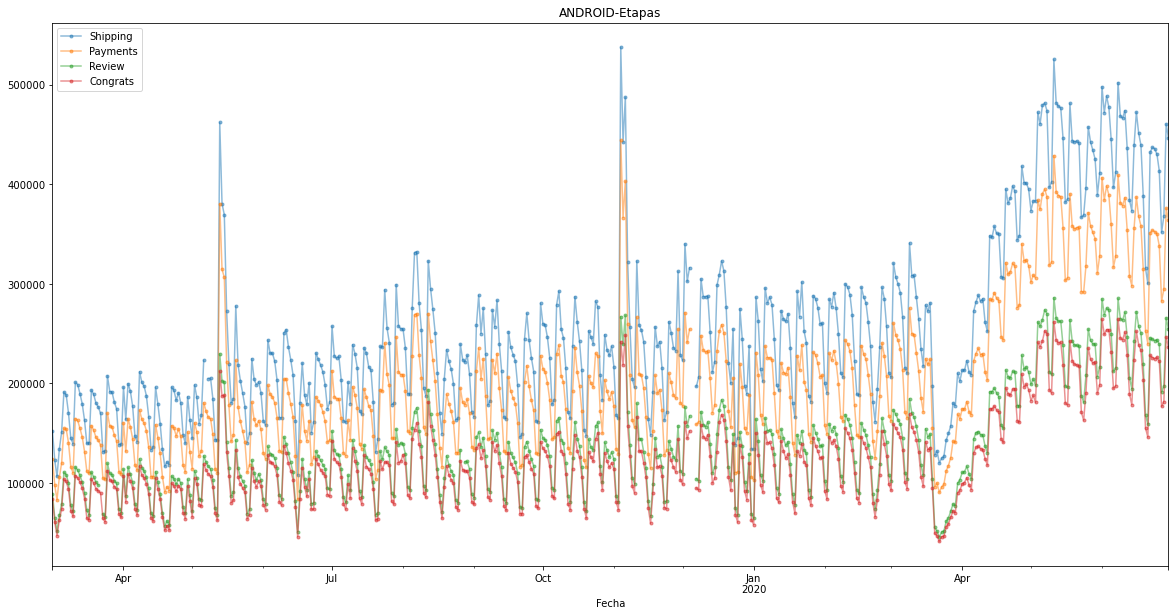

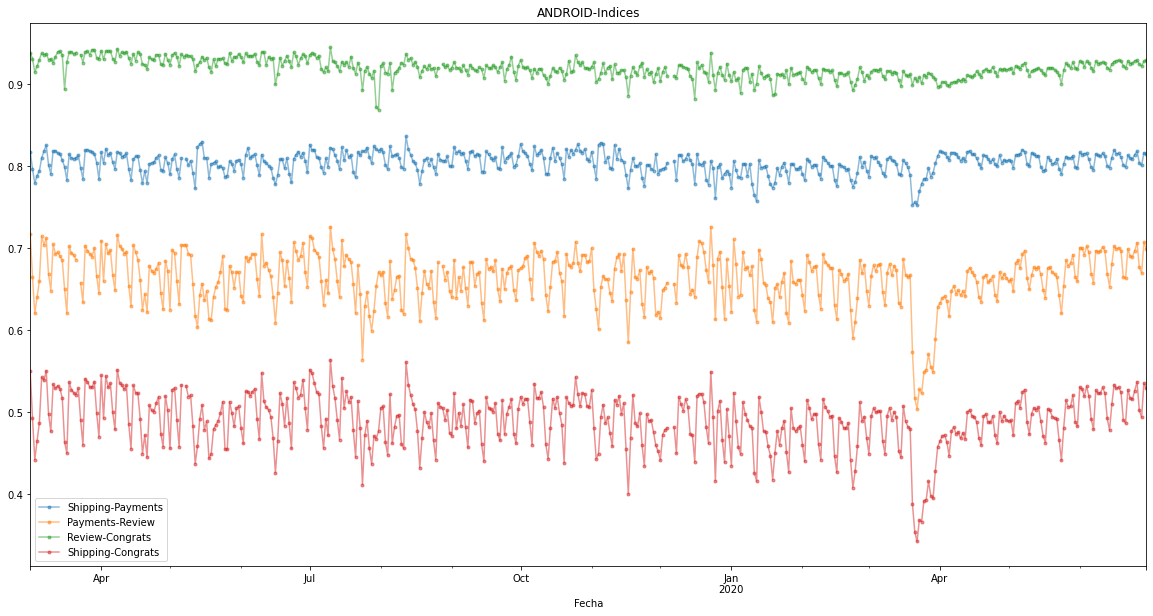

In [27]:
df_traffic_android[cols_etapas].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10)).set_title("ANDROID-Etapas")
df_traffic_android[cols_indices].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10)).set_title("ANDROID-Indices")

# Acá tienen que ir muchas conclusiones de que vemos

# Tratamiento de valores faltantes y nulos

Para poder trabajar con las series, se procederá a imputar tanto los datos faltantes como los nulos. Para ello elegimos usar el método de interpolate

# explicar porque este método

Tipos de interpolacion posibles: 
kinds = ('linear', 'index', 'pad', 'values', 'nearest', 'zero', 'slinear','quadratic', 'cubic', 'barycentric', 'krogh', 'akima','from_derivatives', 'pchip', 'spline', 'polynomial')

Para interpolar utilizaremos el dataframe "df_traf", en el cual solo tenemos las columnas originales de las etapas de compra. Ignoraremos por el momento las columnas agregadas relativas a las fechas y a los índices de conversión.



In [88]:
df_traf_int = df_traf.interpolate()

In [89]:
#generamos una copia para volver a agregarle las columnas de interes 
df_traffic2=df_traf_int.copy()

#columnas de índices
df_traffic2["Shipping-Payments"] = df_traffic2["Payments"] / df_traffic2["Shipping"]
df_traffic2["Payments-Review"] = df_traffic2["Review"] / df_traffic2["Payments"]
df_traffic2["Review-Congrats"] = df_traffic2["Congrats"] / df_traffic2["Review"]
df_traffic2["Shipping-Congrats"] = df_traffic2["Congrats"] / df_traffic2["Shipping"]

#columnas relativas a las fechas
df_traffic2["Weekday"] = df_traf_int.index.day_name()
df_traffic2["Month"] = df_traf_int.index.month_name()
df_traffic2["Year"] = df_traf_int.index.year
new = df_traffic2["Month"].copy().astype(str)
new1 = df_traffic2["Year"].copy().astype(str)
df_traffic2["Months"]= new.str.cat(new1, sep ="-")

# volvemos a definir los dos datasets de interes con las nuevas columnas
df_traffic2_desktop = df_traffic2[df_traffic2.Device==("Desktop")]
df_traffic2_android = df_traffic2[df_traffic2.Device==("Android")]

In [90]:
#Lo primero a verificar imputando los valores, es no romper la lógica del drop-out manteniendo los indices de conversión menores a 1
df_traffic2[cols_indices].describe()

,Shipping-Payments,Payments-Review,Review-Congrats,Shipping-Congrats
count,976.00,976.00,976.00,976.00
mean,0.82,0.71,0.95,0.56
std,0.05,0.06,0.03,0.08
min,0.03,0.44,0.86,0.02
25%,0.81,0.67,0.92,0.49
50%,0.82,0.71,0.94,0.55
75%,0.85,0.77,0.97,0.63
max,1.34,0.81,1.43,0.88


Pudimos observar que los mètodos: lineal por defecto, cñubico, polinomial de 3 orden, spline de 2 orden, pchip, akima,  no fueron útiles dado que ciertos índices tienen valores mayores a uno. Todo lo de abajo no tiene sentido seguir desarrollando hasta no encontrar un método de interpolación que no nos rompa todo.


In [91]:
#Observamos el dataframe en la primera semana de 
df_traffic2['2019-12-05':'2019-12-06']

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Shipping-Payments,Payments-Review,Review-Congrats,Shipping-Congrats,Weekday,Month,Year,Months
Fecha,,,,,,,,,,,,,,,,
2019-12-05,direct,MLA,Android,"158,850.80","149,912.00","34,832.60","22,936.00","21,016.80",0.23,0.66,0.92,0.14,Thursday,December,2019,December-2019
2019-12-05,direct,MLA,Desktop,"170,769.60","161,700.00","65,842.20","43,275.00","39,495.60",0.41,0.66,0.91,0.24,Thursday,December,2019,December-2019
2019-12-06,direct,MLA,Android,"182,688.40","173,488.00","96,851.80","63,614.00","57,974.40",0.56,0.66,0.91,0.33,Friday,December,2019,December-2019
2019-12-06,direct,MLA,Desktop,"194,607.20","185,276.00","127,861.40","83,953.00","76,453.20",0.69,0.66,0.91,0.41,Friday,December,2019,December-2019


In [87]:
#Observamos el dataframe en la primera semana de 
df_traffic2['2019-12-05':'2019-12-06']

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Shipping-Payments,Payments-Review,Review-Congrats,Shipping-Congrats,Weekday,Month,Year,Months
Fecha,,,,,,,,,,,,,,,,
2019-12-05,direct,MLA,Android,"158,850.80","149,912.00","34,832.60","22,936.00","21,016.80",0.23,0.66,0.92,0.14,Thursday,December,2019,December-2019
2019-12-05,direct,MLA,Desktop,"170,769.60","161,700.00","65,842.20","43,275.00","39,495.60",0.41,0.66,0.91,0.24,Thursday,December,2019,December-2019
2019-12-06,direct,MLA,Android,"182,688.40","173,488.00","96,851.80","63,614.00","57,974.40",0.56,0.66,0.91,0.33,Friday,December,2019,December-2019
2019-12-06,direct,MLA,Desktop,"194,607.20","185,276.00","127,861.40","83,953.00","76,453.20",0.69,0.66,0.91,0.41,Friday,December,2019,December-2019


In [ ]:
#volvemos a analizamos el comportamiento en dicho mes según el día de la semana
df_traffic2_desktop['2019-12'].groupby('Weekday')[cols_indices].std()

Los días imputadis corresponden a Jueves y Viernes donde podemos notar un claro aumento de la desviación estandar.

In [ ]:
df_traffic_android['2019-03':'2019-08'][cols_etapas].plot( marker='.', alpha=0.5, linestyle='-',sharey="all",figsize=(20, 10)).set_title("ANDROID-Etapas")
df_traffic_android['2019-03':'2019-08'][cols_indices].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10)).set_title("ANDROID-Indices")

In [ ]:
df_traffic2_android['2019-12'][cols_etapas].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10)).set_title("ANDROID INTERP-Etapas")
df_traffic2_android['2019-12'][cols_indices].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10)).set_title("ANDROID INTERP-Indices")

Tanto la interpolación cúbica como la polinomial de 3er orden fueron descartadas dado que los valores imputados no eran lógicos. 

In [ ]:
cols_indices_log=['Shipping-Payments(log)',
 'Payments-Review(log)',
 'Review-Congrats(log)',
 'Shipping-Congrats(log)']
cols_indices_log

In [ ]:
df_traffic[cols_indices_log] = np.log(df_traffic[cols_indices])

In [ ]:
df_traffic_int[cols_indices_log] = np.log(df_traffic_int[cols_indices])

In [ ]:
df_traffic_int.head()

In [ ]:
# volvemos a definir los dos datasets de interes con las nuevas columnas
df_traffic_int_desktop = df_traffic_int[df_traffic_int.Device==("Desktop")]
df_traffic_int_android = df_traffic_int[df_traffic_int.Device==("Android")]

In [ ]:
df_traffic[df_traffic_int["Device"]=="Android"][cols_indices_log].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10), ylim=[-1,0]).set_title("ANDROID - indices log")
df_traffic_int[df_traffic_int["Device"]=="Android"][cols_indices_log].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10),).set_title("ANDROID interpolada indices log")

In [ ]:
df_traffic[df_traffic_int["Device"]=="Desktop"][cols_indices_log].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10), ylim=[-1,0]).set_title("DESKTOP - indices log")
df_traffic_int[df_traffic_int["Device"]=="Desktop"][cols_indices_log].plot( marker='.', alpha=0.5, linestyle='-',sharey="all", figsize=(20, 10),).set_title("DESKTOP interpolada indices log")

In [ ]:
df_traffic[cols_indices_log].describe()

In [ ]:
df_traffic_int[cols_indices_log].describe()